# Example workflow for using flosp to import and clean ED data

We need to back up into diretory with flosp in if its not installed on python path/through conda.

In [1]:
%cd ".\.."

C:\Users\bjk1y13\OneDrive - University of Southampton\MH030_HHFT_flow\4_Analysis\flosp


In [2]:
import flosp

## initialise flosp

You must provide the path to the setup file, which you should edit to your project specifics.

In [3]:
from flosp import Interface

In [5]:
hosp = Interface(setup_file_path='./example/setup.py')

flosp started.
Imported setup.py sucessfully.
Loading processed data from pickles.
Missing: ./hosp1/example_results/processed/ED.pkl
Missing: ./hosp1/example_results/processed/IP.pkl
Missing: ./hosp1/example_results/processed/IPSPELL.pkl
Missing: ./hosp1/example_results/processed/HOURLY.pkl
Missing: ./hosp1/example_results/processed/DAILY.pkl


### Importing ED data

load raw data for io.

In [7]:
hosp.load_dataED('./example/example_data_ED.csv') #,nrows=1500) # limit number of rows for quick runtime during dev

IO class called.
ARRIVAL_DTTM
TRIAGE_ASSESSMENT_DTTM
FIRSTDOC_FOR_TREATMENT_DTTM
ADM_REQUEST_DTTM
DEPARTURE_DTTM
----------------------------------------
Making callender columns from:  ARRIVAL_DTTM
----------------------------------------
Making callender columns from:  DEPARTURE_DTTM
----------------------------------------
saved file: ./hosp1/example_results/processed/ED.pkl
Import completed.


look at the dataframe at any stage of processing using extract_data method.

In [8]:
hosp.extract_data('ED').head()

,PSEUDONYMISED_PATIENT_ID,AGE_AT_ARRIVAL,GENDER_NATIONAL_DESCRIPTION,SITE,ARRIVAL_DTTM,ARRIVAL_MODE_NATIONAL_CODE,TRIAGE_ASSESSMENT_DTTM,FIRSTDOC_FOR_TREATMENT_DTTM,ADM_REQUEST_DTTM,ADM_REQUEST_LOC_DESCRIPTION,...,age_group,waiting_time,arr_triage_wait,arr_dr_wait,arr_adm_req_wait,adm_req_dep_wait,dr_adm_req_wait,dr_dep_wait,BREACH_FLAG,breach_datetime
0,4484,56,Female,HOSPITAL1,2013-08-04 09:59:00,2.0,2013-08-01 10:52:00,2013-08-01 12:41:00,NaT,NaN,...,18-64,-1297.0,-4267.0,-4158.0,NaN,NaN,NaN,2861.0,0,2013-08-04 13:59:00
1,3924,88,Female,HOSPITAL1,2014-04-09 10:14:00,1.0,2014-04-10 08:55:00,2014-04-08 10:51:00,2014-04-09 13:29:15,General Medicine,...,65+,294.0,1361.0,-1403.0,195.25,98.75,1598.25,1697.0,1,2014-04-09 14:14:00
2,2622,41,Female,HOSPITAL1,2012-11-30 03:49:00,1.0,2012-11-30 05:30:00,2012-11-29 05:43:00,NaT,NaN,...,18-64,1582.0,101.0,-1326.0,NaN,NaN,NaN,2908.0,1,2012-11-30 07:49:00
3,6868,29,Male,HOSPITAL1,2017-09-06 18:49:00,2.0,2017-09-06 19:04:00,2017-09-05 19:15:00,NaT,NaN,...,18-64,197.0,15.0,-1414.0,NaN,NaN,NaN,1611.0,0,2017-09-06 22:49:00
4,1563,35,Male,HOSPITAL1,2015-07-12 15:54:00,2.0,2015-07-14 16:09:00,2015-07-15 15:41:00,NaT,NaN,...,18-64,2902.0,2895.0,4307.0,NaN,NaN,NaN,-1405.0,1,2015-07-12 19:54:00


## Import IP data

In [9]:
hosp.load_dataIP('./example/example_data_IP.csv')

IO class called.
ADM_DTTM
DIS_DTTM
LOCATION_START
LOCATION_END
----------------------------------------
Making callender columns from:  ADM_DTTM
----------------------------------------
Making callender columns from:  DIS_DTTM


C:\Users\bjk1y13\OneDrive - University of Southampton\MH030_HHFT_flow\4_Analysis\flosp\flosp\basic_tools.py:99: UserWarning: Some datetimes in your column are missing.
  warnings.warn('Some datetimes in your column are missing.')


----------------------------------------
saved file: ./hosp1/example_results/processed/IP.pkl
Import completed.


In [10]:
hosp.extract_data('IP').head()

,LOCATION_NUMBER,ADM_SOURCE_CODE,ADM_METHOD,ADM_DTTM,ADM_TYPE,SITE,GENDER_NATIONAL_DESCRIPTION,LOCATION_END,DIS_DESTINATION,DIS_METHOD,...,DIS_dayofweek,DIS_day,DIS_month,DIS_week,DIS_dayofweek_name,DIS_year,DIS_date,DIS_flag_wkend,age_group,ADM_METHOD_simple
0,1,19,31,2017-07-05 07:32:00,Non-Elective,HOSPITAL1,2,2017-07-08 13:53:00,19.0,1.0,...,5.0,8.0,7.0,27.0,Saturday,2017.0,2017-07-08,0,18-64,Maternity
2,9,19,21,2017-11-09 22:08:00,Non-Elective,HOSPITAL1,1,2017-12-19 09:38:00,19.0,1.0,...,2.0,20.0,12.0,51.0,Wednesday,2017.0,2017-12-20,0,65+,ED
3,12,19,21,2017-12-08 17:41:00,Non-Elective,HOSPITAL1,1,2018-02-03 11:00:00,19.0,1.0,...,5.0,3.0,2.0,5.0,Saturday,2018.0,2018-02-03,0,65+,ED
4,2,19,21,2018-04-07 15:25:00,Non-Elective,HOSPITAL1,1,2018-04-11 19:51:00,19.0,1.0,...,2.0,11.0,4.0,15.0,Wednesday,2018.0,2018-04-11,0,65+,ED
5,1,19,12,2017-06-01 07:14:00,Day Case,HOSPITAL1,1,2017-06-01 16:15:00,19.0,1.0,...,2.0,31.0,5.0,22.0,Wednesday,2017.0,2017-05-31,0,18-64,other


# Make aggregated tables at hourly and daily level

In [11]:
hosp.make_new_tables()

----------------------------------------
saved file: ./hosp1/example_results/processed/IPSPELL.pkl


C:\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: FutureWarning: In the future, NAT != NAT will be True rather than False.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
C:\Users\bjk1y13\OneDrive - University of Southampton\MH030_HHFT_flow\4_Analysis\flosp\flosp\aggregation.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['event_column_name_rounded'] = df[event_column_name].apply(lambda x : x.replace(second=0, minute=0)) # round to lower hour


Calculating EDocc_total: 0 records were dropped because of missing time stamps(out of total: 28382)
Calculating EDocc_breaching_patients: 0 records were dropped because of missing time stamps(out of total: 12102)
Calculating EDocc_awaiting_adm: 1375 records were dropped because of missing time stamps(out of total: 6519)
Calculating IPocc_nonelec: 2 records were dropped because of missing time stamps(out of total: 27961)
Calculating IPocc_elec: 2 records were dropped because of missing time stamps(out of total: 11142)
Calculating IPocc_daycases: 0 records were dropped because of missing time stamps(out of total: 53555)
----------------------------------------
Making callender columns from:  date
----------------------------------------
saved file: ./hosp1/example_results/processed/HOURLY.pkl
----------------------------------------
Making callender columns from:  date
----------------------------------------
saved file: ./hosp1/example_results/processed/DAILY.pkl


Now that these data have been loaded, and the tables have been made, you no longer need to load them again. They are saved in pickle files in the location you specified in the setup.py folder.

To access you just need to use the command: hosp = Interface(setup_file_path='./example/setup.py') again.

All processed + cleaned data sets are available as pandas dataframes using: hosp.data.DATANAME


In [13]:
hosp.data.IPSPELL.head(2)

,ADM_SOURCE_CODE,ADM_METHOD,ADM_DTTM,ADM_TYPE,SITE,GENDER_NATIONAL_DESCRIPTION,DIS_DESTINATION,DIS_METHOD,FIRST_LOCATION,PSEUDONYMISED_PATIENT_ID,...,DIS_day,DIS_month,DIS_week,DIS_dayofweek_name,DIS_year,DIS_date,DIS_flag_wkend,age_group,ADM_METHOD_simple,event_column_name_rounded
0,19,31,2017-07-05 07:32:00,Non-Elective,HOSPITAL1,2,19.0,1.0,1269,6676,...,8.0,7.0,27.0,Saturday,2017.0,2017-07-08,0,18-64,Maternity,2017-07-08 14:00:00
5,19,12,2017-06-01 07:14:00,Day Case,HOSPITAL1,1,19.0,1.0,22,643,...,31.0,5.0,22.0,Wednesday,2017.0,2017-05-31,0,18-64,other,2017-05-31 17:00:00


# plotting

There are 3 types of plots: historical, periodic, weekly.
Call each seperately as below.

To produce all historical plots:

C:\Users\bjk1y13\OneDrive - University of Southampton\MH030_HHFT_flow\4_Analysis\flosp\flosp\plotting.py:203: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  table = table.loc[self.IPyears]
C:\Users\bjk1y13\OneDrive - University of Southampton\MH030_HHFT_flow\4_Analysis\flosp\flosp\plotting.py:222: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  table = table.loc[self.IPyears]


      ED admissions  ED attendances  conversion ratio  Day Case  Elective  \
2016         1326.0          5532.0              24.0       NaN       2.0   
2017         1281.0          5483.0              23.4   35836.0    7337.0   
2018            NaN             NaN               NaN       NaN       NaN   

      Non-Elective  
2016           NaN  
2017       18419.0  
2018           NaN  


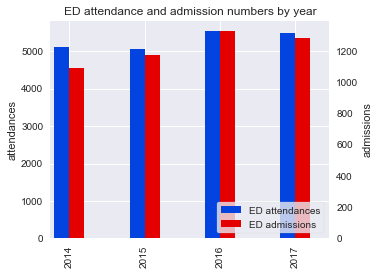

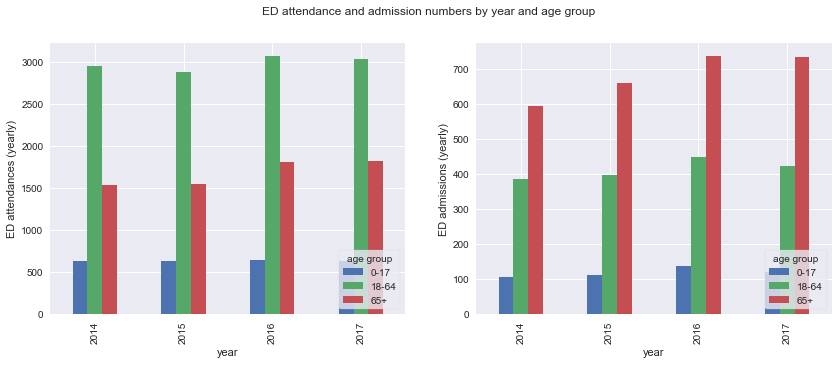

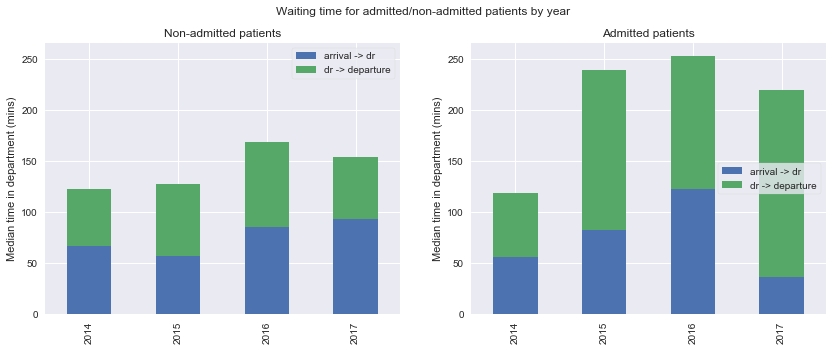

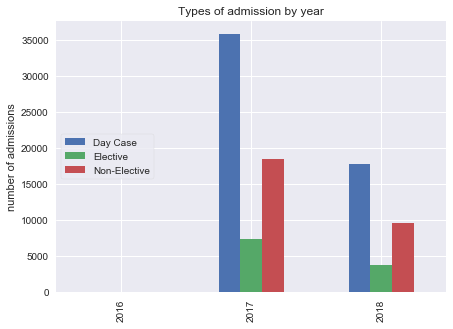

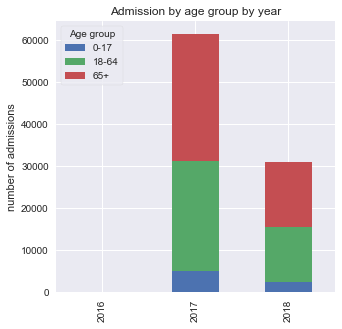

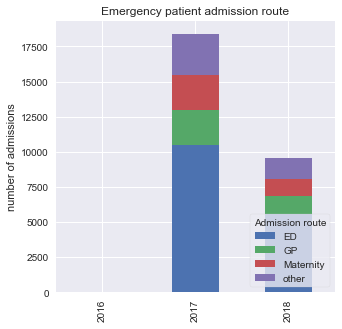

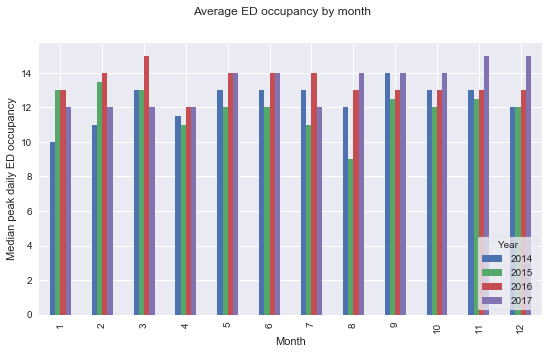

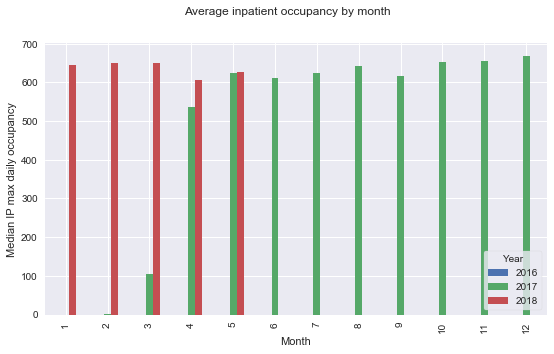

In [19]:
hosp.plot_historical([2014,2015,2016,2017],[2016,2017,2018])

Plotting information about a specific period. For example a single year 2017.

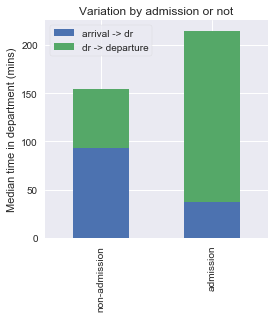

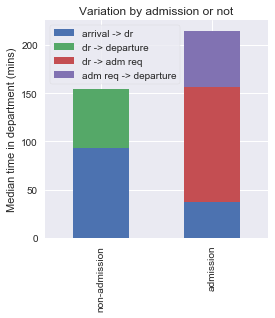

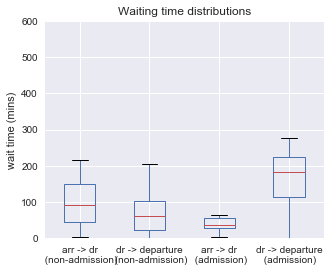

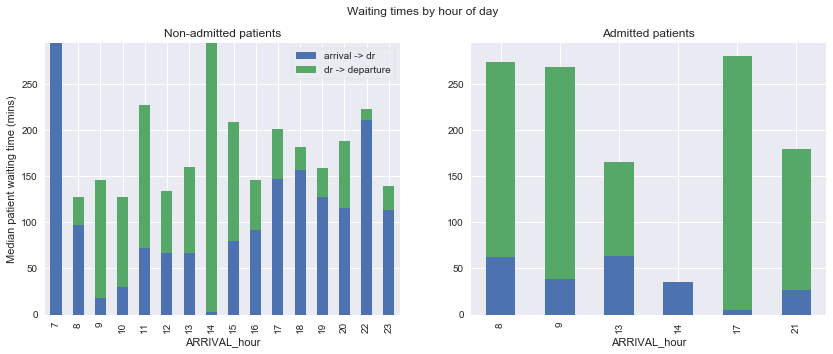

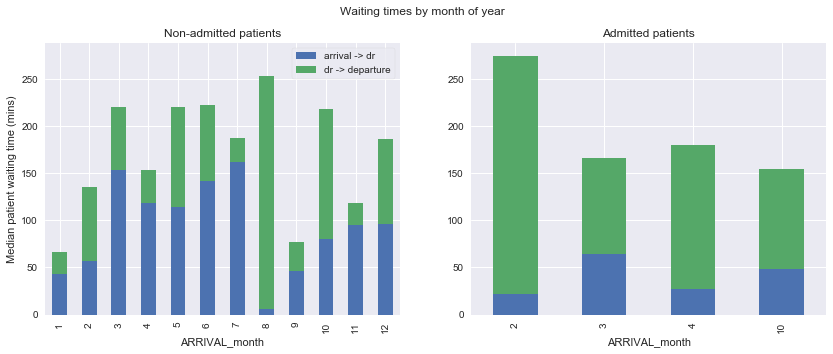

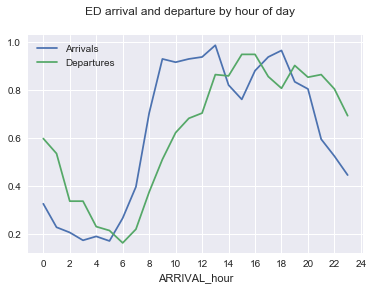

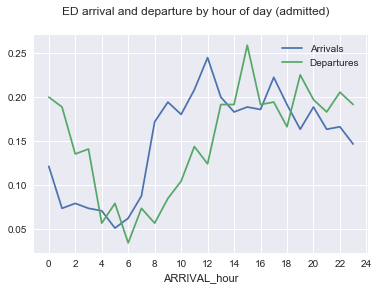

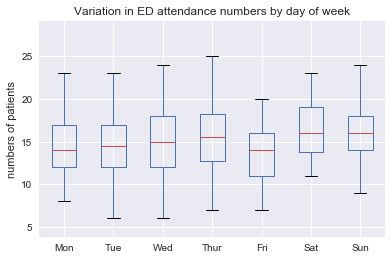

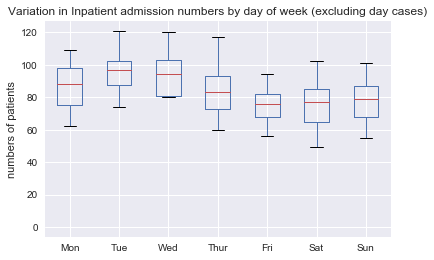

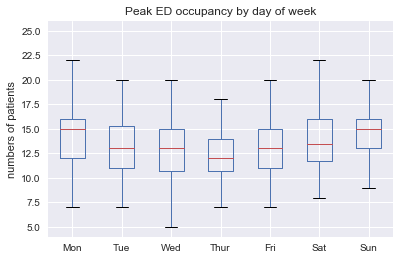

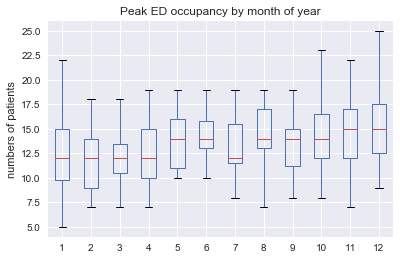

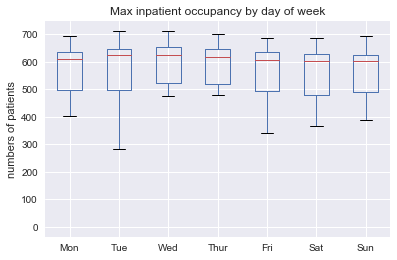

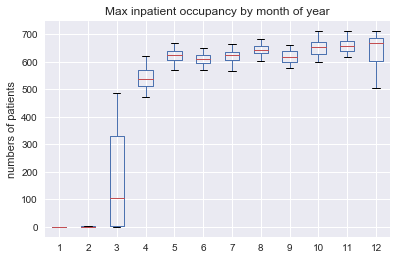

In [22]:
import pandas as pd
start = pd.datetime(2017,1,1)
end = pd.datetime(2018,1,1)
hosp.plot_period(start,end)

Plotting of a week long of activity

2018-01-01 00:00:00
2018-01-01 00:00:00


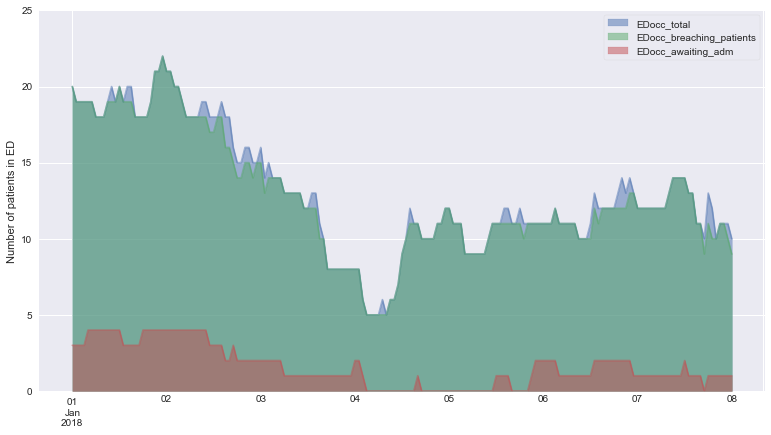

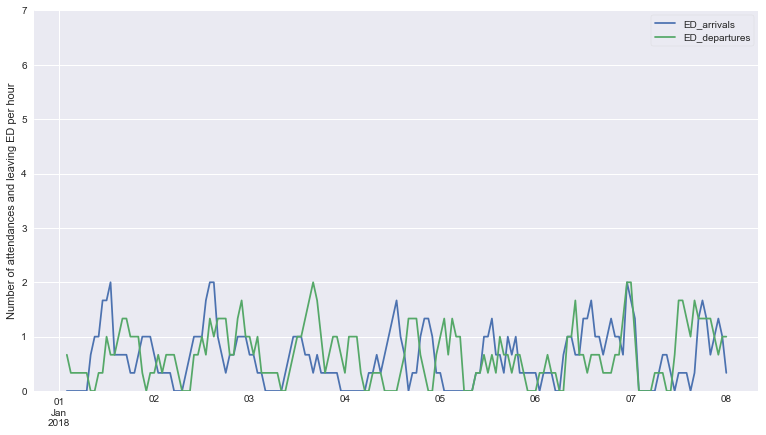

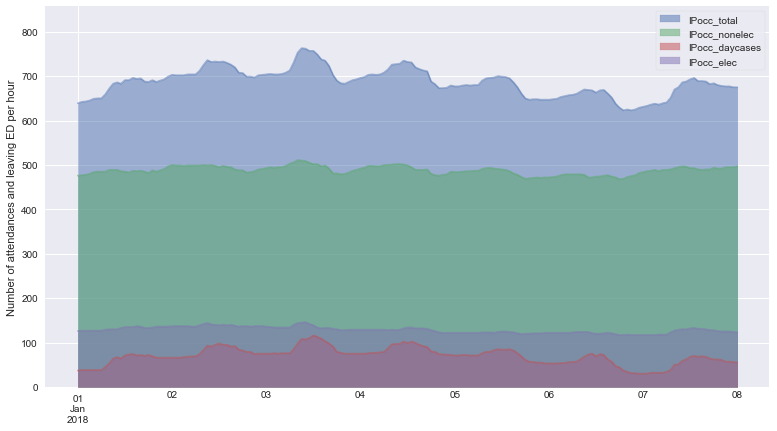

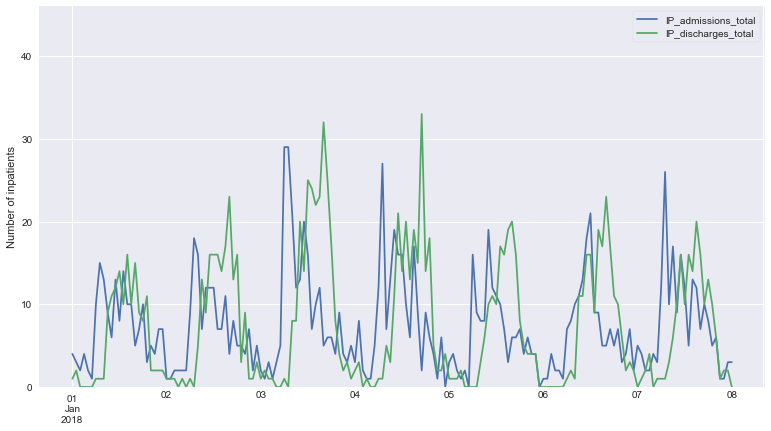

In [24]:
hosp.plot_week(end)

A list of all possible plots can be found here:

In [25]:
hosp.get_plot_list()

,plot_number,plot_name,plot_type,data_required
0,1,ED attendance and admission numbers by year,hist,[ED]
1,2,ED attendance and admission numbers by year an...,hist,[ED]
2,3,Variation by admission or not,period,[ED]
3,4,Variation by admission or not,period,[ED]
4,5,Waiting time for admitted/non-admitted patient...,hist,[ED]
5,6,Waiting time distributions,period,[ED]
6,7,Waiting times by hour of day,period,[ED]
7,8,Waiting times by month of year,period,[ED]
8,9,ED arrival and departure by hour of day,period,[ED]
9,10,ED arrival and departure by hour of day (admit...,period,[ED]


Individual plots can be called, e.g.

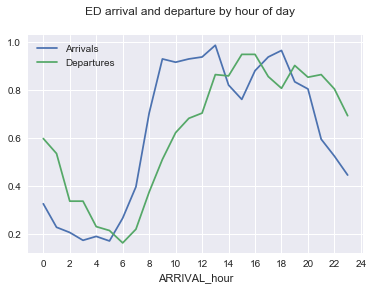

In [27]:
hosp.plot_period(start,end,required_plot_no=9)